In [11]:
# Initial imports
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import joblib  # For exporting the model

In [12]:

# Read data and copy
df = pd.read_csv('Resourse\\Student_performance_data _.csv')
df


,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [13]:

# data cleaning

df_model = df.copy()

# Dropping StudentID column 
df = df.drop(columns=['StudentID'])

# Replace categorical values for better visualization
df['Gender'] = df['Gender'].replace({0: 'male', 1: 'female'})
df['Ethnicity'] = df['Ethnicity'].replace({0: 'caucasian', 1: 'african-american', 2: 'asian', 3: 'other'})
df['ParentalEducation'] = df['ParentalEducation'].replace({0: 'none', 1: 'high-school', 2: 'some-college', 3: 'bachelors', 4: 'higher'})
df['ParentalSupport'] = df['ParentalSupport'].replace({0: 'none', 1: 'low', 2: 'moderate', 3: 'high', 4: 'very high'})
df['Tutoring'] = df['Tutoring'].replace({0: 'false', 1: 'true'})
df['Extracurricular'] = df['Extracurricular'].replace({0: 'false', 1: 'true'})
df['Sports'] = df['Sports'].replace({0: 'false', 1: 'true'})
df['Music'] = df['Music'].replace({0: 'false', 1: 'true'})
df['Volunteering'] = df['Volunteering'].replace({0: 'false', 1: 'true'})
df['GradeClass'] = df['GradeClass'].replace({0.0: 'A', 1.0: 'B', 2.0: 'C', 3.0: 'D', 4.0: 'F'})

# Saving the updated dataset as CSV
df.to_csv('Resourse/updated_data.csv', index=False)

In [14]:
# train model


# Drop unnecessary columns for modeling
df_model = df_model.drop(columns=['StudentID', 'GradeClass'])

# Prepare data for model training
# Assuming GPA is a continuous variable and we're performing regression
y = df_model['GPA']
X = df_model.drop(columns=['GPA'])

# Split the data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the feature data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate and train the Linear Regression model
linear_regression_model = LinearRegression()
linear_regression_model.fit(X_train_scaled, y_train)

# Evaluate the model
train_score = linear_regression_model.score(X_train_scaled, y_train)
test_score = linear_regression_model.score(X_test_scaled, y_test)
predictions = linear_regression_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, predictions)

# Print evaluation metrics
print(f"Training Data Score: {train_score}")
print(f"Testing Data Score: {test_score}")
print(f"Mean Squared Error: {mse}")

# Export the trained model and scaler to files
joblib.dump(linear_regression_model, 'linear_regression_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Model and scaler have been saved successfully.")

Training Data Score: 0.9541479286300485
Testing Data Score: 0.9532471681022928
Mean Squared Error: 0.03866144149454256
Model and scaler have been saved successfully.


In [15]:
linear_regression_model.coef_

array([-6.44764517e-03,  5.25575613e-03,  4.89479910e-03,  1.23644283e-04,
        1.65558159e-01, -8.44216021e-01,  1.18590344e-01,  1.65285837e-01,
        9.20046930e-02,  8.51520919e-02,  6.07774356e-02, -1.91799473e-03])

In [16]:
model_result = list(zip(X_train.columns, linear_regression_model.coef_))

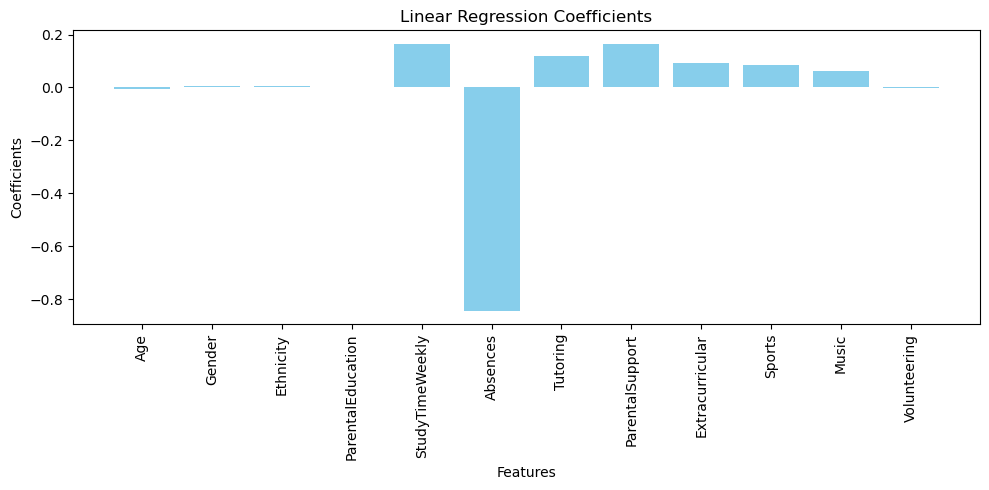

In [18]:
import matplotlib.pyplot as plt

# Extracting the feature names and coefficients
features, coefficients = zip(*model_result)

# Create a bar chart
plt.figure(figsize=(10, 5))
plt.bar(features, coefficients, color='skyblue')
plt.xlabel('Features')
plt.ylabel('Coefficients')
plt.title('Linear Regression Coefficients')
plt.xticks(rotation=90)  
plt.tight_layout()       
plt.show()
